<a href="https://colab.research.google.com/github/AsiyahRahman2003/LinearRegression-/blob/main/news_paper_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [10]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


# Correlation

In [11]:
data.drop('Newspaper',axis=1,inplace=True)
data.corr()                                        #As newspaper has all unique values and is categorical so correlation cant be applied

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [13]:
import warnings
warnings.filterwarnings('ignore')

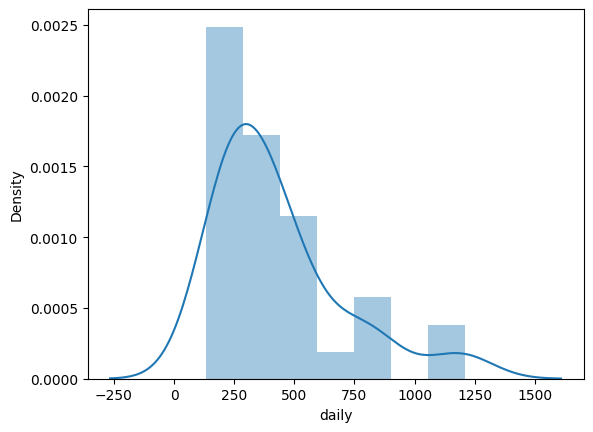

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['daily'])


plt.show()

<Axes: xlabel='sunday', ylabel='Density'>

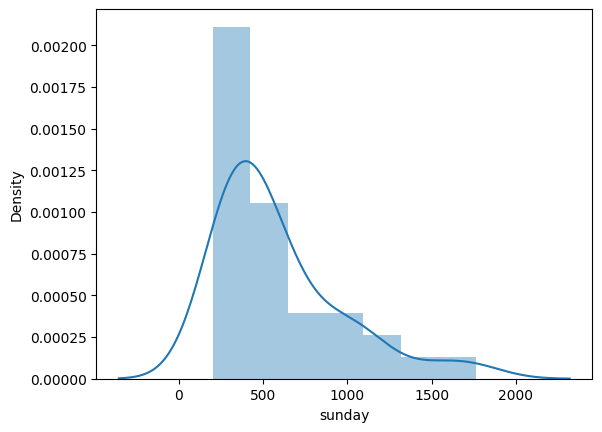

In [15]:
import seaborn as sns
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()      #ordinally least squars ols #target coloum ~

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           6.02e-19
Time:                        07:06:35   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

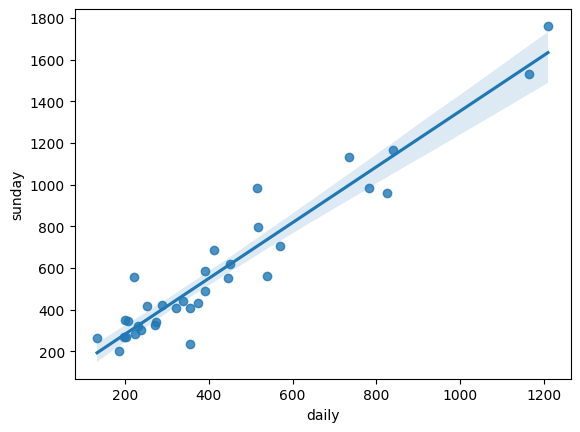

In [21]:
sns.regplot(x="daily", y="sunday", data=data);

In [18]:
#Coefficients
model.params

,0
Intercept,13.835630
daily,1.339715


In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [20]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [25]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,600,500,750,1200])

In [26]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [27]:
model.predict(data_pred)

,0
0,281.778581
1,415.750057
2,817.664485
3,683.693009
4,1018.621698
5,1621.493339
